MSO practice 1


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [11]:
data = pd.read_csv('Downloads/MSO lab1/BankChurners.csv', delimiter=',')

In [13]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
CLIENTNUM                   10127 non-null int64
Attrition_Flag              10127 non-null object
Customer_Age                10127 non-null int64
Gender                      10127 non-null object
Dependent_count             10127 non-null int64
Education_Level             10127 non-null object
Marital_Status              10127 non-null object
Income_Category             10127 non-null object
Card_Category               10127 non-null object
Months_on_book              10127 non-null int64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Avg_Open_To_Buy             10127 non-null float64
Total_Amt_Chng_Q4_Q1        10127 non-null float64
Total_Trans_Amt             10127 non-null int

In [23]:
data.isnull().any().any()

False

In [78]:
data['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [29]:
data['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [73]:
mask = (data['Education_Level'] == 'Uneducated') & (data['Customer_Age'] > 20) & (data['Gender'] == 'M')
uneducatedMen = data[mask]

In [74]:
unEdGroupByEncome = uneducatedMen.groupby('Income_Category')

In [75]:
unEdGroupByEncome.mean()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Income_Category,,,,,,,,,,,,,,,
$120K +,7.391797e+08,47.285714,2.327731,35.806723,3.731092,2.310924,2.672269,20042.268908,1250.705882,18791.563025,0.719109,5168.084034,66.487395,0.665555,0.121647
$40K - $60K,7.412727e+08,46.008621,2.172414,36.137931,3.672414,2.336207,2.646552,6237.632759,1159.689655,5077.943103,0.762672,4451.948276,62.525862,0.706422,0.272914
$60K - $80K,7.375025e+08,46.502564,2.297436,35.630769,3.815385,2.317949,2.389744,11048.390769,1084.523077,9963.867692,0.793369,4398.528205,63.835897,0.743282,0.185744
$80K - $120K,7.388845e+08,46.617512,2.585253,36.184332,3.806452,2.345622,2.506912,16709.372811,1249.576037,15459.796774,0.793747,4771.866359,64.884793,0.710664,0.156558
Less than $40K,7.369038e+08,46.162162,1.540541,37.054054,3.783784,2.540541,2.810811,4738.394595,1364.891892,3373.502703,0.719676,4019.270270,59.513514,0.613216,0.376784
Unknown,7.264502e+08,44.000000,1.428571,36.142857,3.857143,2.857143,2.714286,9955.571429,910.571429,9045.000000,0.849857,2535.857143,53.000000,0.844714,0.137571


In [77]:
uneducatedMen.Income_Category.value_counts()

$80K - $120K      217
$60K - $80K       195
$120K +           119
$40K - $60K       116
Less than $40K     37
Unknown             7
Name: Income_Category, dtype: int64

In [79]:
maskEdu = (data['Education_Level'] == 'Post-Graduate') & (data['Customer_Age'] > 20) & (data['Gender'] == 'M')
educatedMen = data[maskEdu]
educatedMen.Income_Category.value_counts()

$80K - $120K      81
$60K - $80K       77
$40K - $60K       50
$120K +           30
Less than $40K    10
Unknown            5
Name: Income_Category, dtype: int64

In [82]:
educatedMen.Card_Category.value_counts()

Blue        222
Silver       25
Gold          4
Platinum      2
Name: Card_Category, dtype: int64

In [145]:
uneducatedMen.Card_Category.value_counts()

Blue        639
Silver       43
Gold          7
Platinum      2
Name: Card_Category, dtype: int64

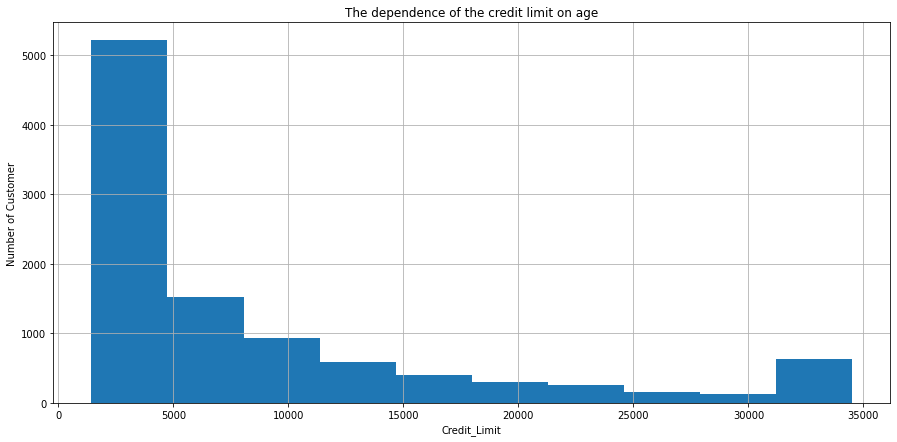

In [105]:
plt.figure(figsize=(15,7))
plt.title('The dependence of the credit limit on age')
data['Credit_Limit'].hist()
plt.xlabel('Credit_Limit')
plt.ylabel('Number of Customer')
plt.show()

In [111]:
meanCL = data['Credit_Limit'].mean()
customersFewCL = data[data['Credit_Limit'] < meanCL]
customersManyCL = data[data['Credit_Limit'] >= meanCL]
print(customersFewCL['Customer_Age'].mean())
print(customersManyCL['Customer_Age'].mean())

46.30940023068051
46.36195549984331


In [115]:
def age_classify(row):
    if row.Customer_Age>=55:
        return 'Old'
    elif row.Customer_Age>=40:
        return 'Medium'
    else:
        return 'Young'
    
age_category = data.apply(age_classify,axis='columns')
print(age_category.value_counts())

Medium    6481
Young     2036
Old       1610
dtype: int64


In [118]:
data['Age_Category'] = age_category
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
CLIENTNUM                   10127 non-null int64
Attrition_Flag              10127 non-null object
Customer_Age                10127 non-null int64
Gender                      10127 non-null object
Dependent_count             10127 non-null int64
Education_Level             10127 non-null object
Marital_Status              10127 non-null object
Income_Category             10127 non-null object
Card_Category               10127 non-null object
Months_on_book              10127 non-null int64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Avg_Open_To_Buy             10127 non-null float64
Total_Amt_Chng_Q4_Q1        10127 non-null float64
Total_Trans_Amt             10127 non-null int

<AxesSubplot:xlabel='Customer_Age'>

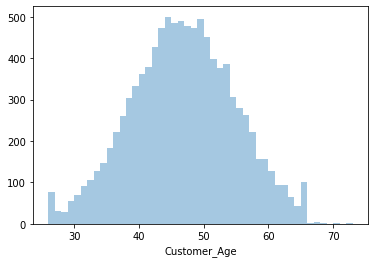

In [120]:
sns.distplot(data['Customer_Age'], kde=False)

c:\users\killm\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Customer_Age', ylabel='Density'>

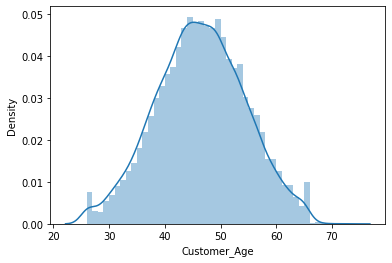

In [124]:
sns.distplot(data['Customer_Age'], kde=True)

c:\users\killm\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\killm\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


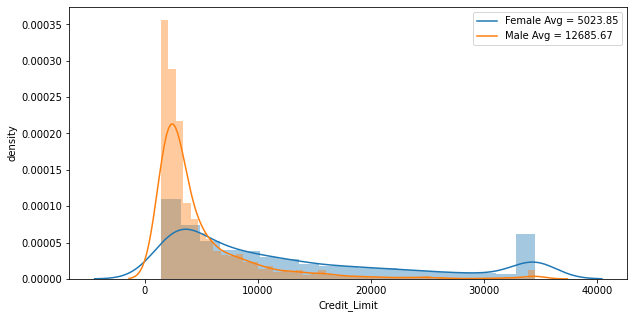

In [130]:
plt.figure(figsize=(10,5))
sns.distplot(data['Credit_Limit'][data['Gender'] == "M"], kde=True)
sns.distplot(data['Credit_Limit'][data['Gender'] == "F"], kde=True)
plt.ylabel("density")
plt.xlabel("Credit_Limit")
plt.legend(('Female Avg = '+str(np.round(np.mean(data["Credit_Limit"][data["Gender"]=="F"]),2)),
            'Male Avg = '+str(np.round(np.mean(data["Credit_Limit"][data["Gender"]=="M"]),2))))
plt.show()

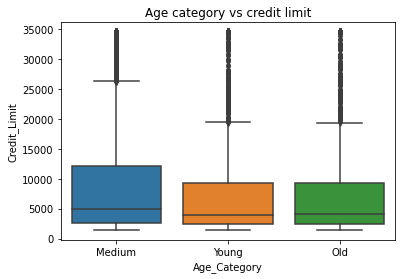

In [133]:
plt.title("Age category vs credit limit")
ax = sns.boxplot(x="Age_Category", y="Credit_Limit", data=data)
plt.show()

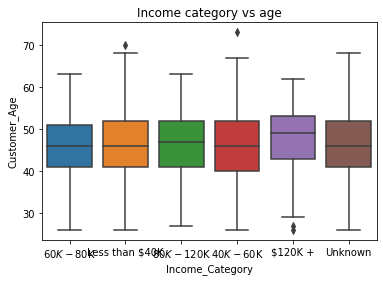

In [136]:
plt.title("Income category vs age")
ax = sns.boxplot(x="Income_Category", y="Customer_Age", data=data)
plt.show()

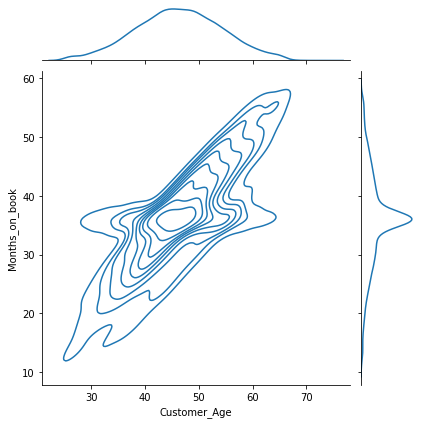

In [142]:
sns.jointplot(x=data['Customer_Age'], y=data['Months_on_book'], kind="kde")